# My Jupyter experiments
Based on DataCamp tutorial.
>Author: Andkoc001  
>Created: 05/05/2019

## Environment set up
### Importing libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

### Global temperature
Loading data set

In [92]:
# Reading in the global temperature data
global_temp = pd.read_csv("global_temperature.csv")

Some basic information about the data set

In [93]:
global_temp.shape

(167, 2)

In [94]:
global_temp.describe()

,year,degrees_celsius
count,167.00000,167.000000
mean,1933.00000,8.561856
std,48.35287,0.500798
min,1850.00000,7.490000
25%,1891.50000,8.160000
50%,1933.00000,8.530000
75%,1974.50000,8.785000
max,2016.00000,10.020000


In [95]:
global_temp.head(3)

,year,degrees_celsius
0,1850,7.74
1,1851,8.09
2,1852,7.97


In [96]:
global_temp.tail(2)

,year,degrees_celsius
165,2015,9.82
166,2016,10.02


Data set plot

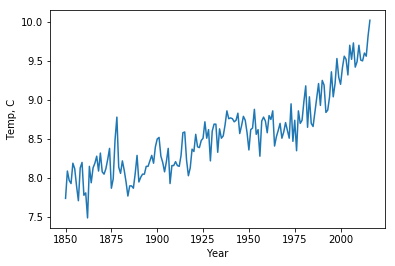

In [97]:
# Plotting global temperature in degrees celsius by year
plt.plot(global_temp['year'], global_temp['degrees_celsius'])

# Adding some nice labels 
plt.xlabel('Year') 
plt.ylabel('Temp, C') 
plt.show()

### Maps with `folium` module

In [98]:
import folium
folium.Map(location=[45.372, -121.6972],
           zoom_start=12,
           tiles='http://{s}.tiles.yourtiles.com/{z}/{x}/{y}.png',
           attr='My Data Attribution')

m = folium.Map(location=[45.5236, -122.6750],
               zoom_start=14,
               tiles='Stamen Toner')
m

## PROJECT: DR. SEMMELWEIS AND THE DISCOVERY OF HANDWASHING
Based on DataCamp project: https://projects.datacamp.com/projects/20 and https://github.com/datacamp/projects-discovery-of-handwashing-r

In [99]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("yearly_deaths_by_clinic.csv")

# Print out yearly
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [100]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly["clinic"] == "clinic 1"]
yearly2 = yearly[yearly["clinic"] == "clinic 2"]

# Print out yearly1
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


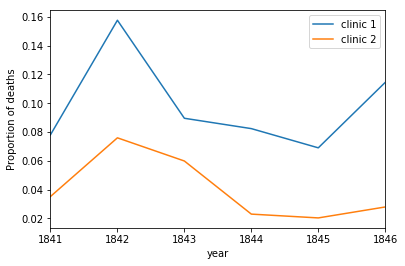

In [101]:
# This makes plots appear in the notebook
%matplotlib inline

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x="year", y="proportion_deaths", label="clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="clinic 2", ax=ax)
ax.set_ylabel("Proportion of deaths")
plt.show()

In [103]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("monthly_deaths.csv", parse_dates=["date"])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]

# Print out the first rows in monthly
# monthly.shape
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


Another data set loaded - monthly log

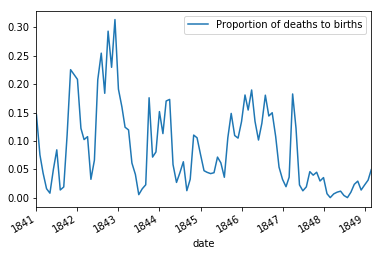

In [113]:
# This makes plots appear in the notebook
# %matplotlib inline
# Plot monthly proportion of deaths
monthly.plot(x="date", y="proportion_deaths", label="Proportion of deaths to births")
ax.set_ylabel("Proportion of deaths")
plt.show()

Monthly data set split into two.

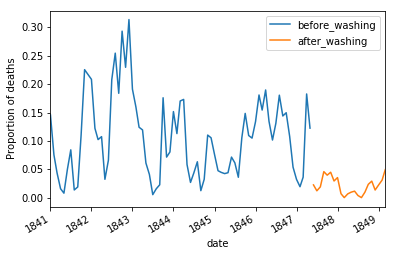

In [106]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x="date", y="proportion_deaths", label="before_washing")
after_washing.plot(x="date", y="proportion_deaths", label="after_washing", ax=ax)
ax.set_ylabel("Proportion of deaths")
plt.show()

In [108]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = monthly[monthly["date"] < handwashing_start]
after_proportion = monthly[monthly["date"] >= handwashing_start]

bf = before_proportion["proportion_deaths"].mean()
# bf
af = after_proportion["proportion_deaths"].mean()
# af

mean_diff = bf - af
mean_diff

0.0839566075118334

In [109]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(5000):
    boot_before = before_proportion["proportion_deaths"].sample(frac=1, replace=True)
    boot_after = after_proportion["proportion_deaths"].sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff; 50% = mean_diff for i going to infinity
confidence_interval = pd.Series(boot_mean_diff).quantile([0.05, 0.95])
confidence_interval

0.05   -0.098446
0.95   -0.070010
dtype: float64